In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wandb_loader import get_sweep_results, EPOCH, COCO_AP

colors = sns.color_palette("rocket")

sns.set(
    style='whitegrid',
    font_scale=1.2,
    rc={
        'lines.linewidth': 1.2,
        'lines.markersize': 18,
    }
)

fig_path = Path('./imgs')

# AP van joint model met verplaatste RoI head

Sweep [3nsvvc9p](https://wandb.ai/jpdr/experiments/sweeps/3nsvvc9p) en [an4t3eqd](https://wandb.ai/jpdr/experiments/sweeps/an4t3eqd).

In [2]:
df_moved_roi = get_sweep_results("3nsvvc9p", lazy=True, config_keys=['featmap_names_recog'])
df_branched = get_sweep_results("an4t3eqd", lazy=True, config_keys=['branch_layer'])

ROI_INPUT = 'Recog RoI input'

fm_to_roi_input = {
    0: 'conv2_x',
    1: 'conv3_x',
    2: 'conv4_x',
    3: 'conv5_x',
}

bl_to_roi_input = {
    'layer1': 'conv1',
    'layer2': 'conv2_x',
    'layer3': 'conv3_x',
    'layer4': 'conv4_x',
    'bbox_head': 'conv5_x',
    'final_pool': 'pool',
    'roi_head': 'bbox head',
}

df_moved_roi[ROI_INPUT] = df_moved_roi['featmap_names_recog'].apply(lambda k: fm_to_roi_input[k])
df_branched[ROI_INPUT] = df_branched['branch_layer'].apply(lambda k: bl_to_roi_input[k])

df = pd.concat(
    [df_moved_roi,
     df_branched[df_branched[ROI_INPUT].isin(['bbox head'])]],
    ignore_index=True
)

## Verplaatst naar output van `conv3_x`

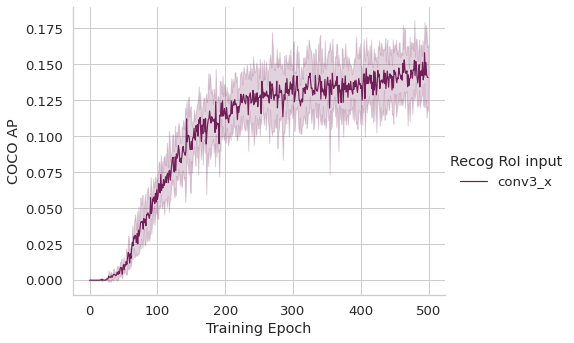

In [3]:
fig_conv3 = sns.relplot(
    data=df[df[ROI_INPUT] == 'conv3_x'],
    x=EPOCH, y=COCO_AP, kind='line', ci='sd', aspect=4/3,
    hue=ROI_INPUT,
    palette=[colors[1]]
)

## Verplaatst naar 1e, 2e, 3e, 4e feature map en bbox head

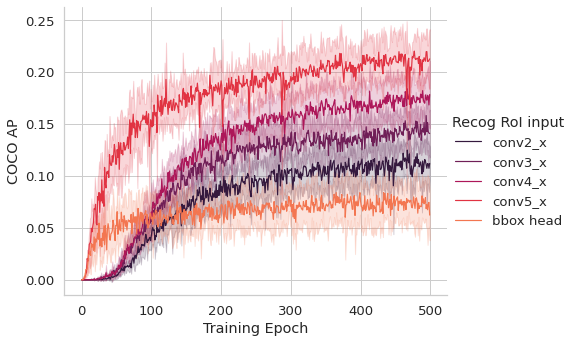

In [4]:
order = ['conv2_x', 'conv3_x', 'conv4_x', 'conv5_x', 'bbox head']

fig_all = sns.relplot(
    data=df,
    x=EPOCH, y=COCO_AP, kind='line', ci='sd', aspect=4/3,
    hue=ROI_INPUT,
    hue_order=order,
    palette=colors[:5]
)

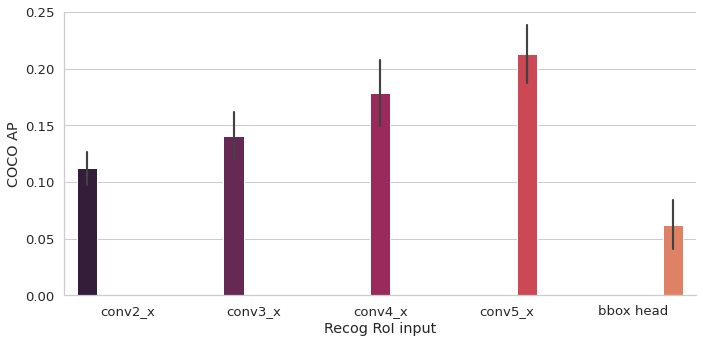

In [5]:
sns.catplot(
    data=df[df[EPOCH] == 499],
    x=ROI_INPUT,
    y=COCO_AP,
    ci='sd',
    hue=ROI_INPUT,
    kind="bar",
    aspect=2,
    order=order,
    hue_order=order,
    palette=colors[:5]
)

In [6]:
fig_conv3.savefig(fig_path / 'COCO_AP_moved_RoI_head_conv3.png')
fig_all.savefig(fig_path / 'COCO_AP_moved_RoI_head_all.png')